<a href="https://colab.research.google.com/github/abhishp021/abhishp021/blob/main/assignment_arya_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
# Import helpful libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Loading dataset

In [ ]:
# Loading the Train Data Set
data = pd.read_csv('/content/training_set.csv')
data

In [ ]:
data.describe

In [ ]:
data['Unnamed: 0']

### Inference
* The column 'Unnamed: 0' is acting like the index.
* So we can remove this column from our dataset
* Y column is our output column

In [ ]:
unchanged_data = data.copy()
data = data.drop('Unnamed: 0', axis = 1)
data.head()

# Exploration

In [ ]:
data.dtypes

> So all of our data is numerical

### Checking Null values

In [7]:
features_with_null_values = []
n_rows = len(data.index)
for feature in data.columns:
    sum_nan = data[feature].isna().sum()
    if sum_nan > 0:
        percentage_nan = sum_nan*100/n_rows
        print("{:15s} {:5d} {:10.3f}%".format(feature, sum_nan, percentage_nan))
        features_with_null_values.append(feature)
    else:
        pass

In [ ]:
print(features_with_null_values)

In [ ]:
data.info()

> No null values

In [ ]:
data.describe()

## Inference
* No null values in dataset
* Scale of values in columns X55, X56, X57. etc. is different than other features in our table

In [ ]:
y = data['Y']
y.value_counts()

> Traning dataset has more values as 0 than 1

#### Checking skewness of our model
A convenient way of evaluating skewness is with pandas’ “.skew” method. It calculates the ***Fisher–Pearson standardized moment coefficient*** for all columns in a dataframe.
* It is applied on numerical variables
* Here all our variables are numerical

In [ ]:
# Skew values of the features 
skewness = pd.DataFrame((data.drop(['Y'],axis =1)).skew(axis = 0).sort_values(ascending = False)).T
skewness

### Inference
* The direction of skewness is given by the sign.
* The coefficient compares the sample distribution with a normal distribution. The larger the value, the larger the distribution differs from a normal distribution.
* A value of zero means no skewness at all.
* A large negative value means the distribution is negatively skewed. A large positive value means the distribution is positively skewed.
* Some models like Decision trees, Random Forest are fairly robust to skewness.

In [13]:
skew_y = data['Y'].skew()
skew_y

0.4412074655482515

In [ ]:
# plot showing the Skew values for every feature

plt.figure(figsize=(25,10))
plt.xlabel('Feature')
plt.ylabel('Skew Values')
plt.plot(data.skew(axis = 0), marker='o')
plt.show()

### Analysis of features

In [ ]:
from matplotlib import rcParams
for col in data.columns:
    if col !='Y':
        rcParams['figure.figsize'] = 9,5
        sns.displot(data[col], kde=True)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

### Inference
* We can see almost all of data is left skewed.
* We can address skewed variables by transforming them. 
* Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x).

# Correlation
* Correlation tells us whether one of multiple features depend on another feature.
* We can say that two variables are highly correlated if they have correlations above 0.5 or 0.7 depeneding on our threshold.
* Multicollinearity - Happens when one feature can be predicted by other or combination of other features with high accuracy.

* Decision Trees and Boosted Trees algorithm are not affected by correlation as their algorithm doesn't make any assumptions about it.
* Logistic Regression and Linear Regression are affected by this problem.
* There are two methods to detect correlation
* Pearson Correlation Coefficient - Used when there is roughly linear relationship between features.
* Spearman Correlation Coefficient - Used when there is non-linear relationship between features.

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.title("Correlation map")
plt.show()

Mapping a 57 x 57 matrix via heatmap is a tough task

In [ ]:
data.drop('Y',axis =1).corr()

Correlataion is difficult to perceive here

## Log Transformation
* This is a part of feature engineering but still we are performing it here to get bettern insights about outliers.
* Log gives a measurement of how "big" a number is in comparision to another number (base of log).
* Further, the larger values tend to bias the model and influence them to a great extent.
* Logarithm scales the data, reduces the range of data, brings linearity to the data and removes skewness to a certain extent while preserving the distribution.

In [17]:
# Log transform the data
log_data = data.copy() # Will not affect the real dataset
for col in log_data.columns:
    if col != "Y":
        log_data[col] = np.log1p(log_data[col])

In [18]:
# pd.pandas.set_option('display.max_columns', None)
log_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.000000,0.000000,1.675226,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.851005,0.000000,0.000000,0.788457,1.098612,2.564949,0
1,0.000000,0.444686,0.444686,0.000000,0.751416,0.444686,1.178655,0.000000,0.0,0.444686,...,0.0,0.079735,0.0,0.407463,0.000000,0.079735,2.850938,5.003946,5.929589,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.693147,0.693147,1.791759,0
3,0.494696,0.000000,0.494696,0.000000,1.075002,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.379805,0.314811,0.000000,1.235471,3.135494,4.812184,1
4,0.457425,0.000000,0.000000,3.596216,0.457425,0.000000,0.457425,0.457425,0.0,0.000000,...,0.0,0.000000,0.0,0.214305,0.214305,0.000000,1.467413,4.820282,5.337538,1


In [ ]:
for col in log_data.columns:
    if col !='Y':
        sns.displot(log_data[col], kde=True)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [ ]:
# Checking for outliers now.
for col in data.columns:    
    if col == 'Y':
        continue
    figure, axes = plt.subplots(1,2, figsize=(14,4))
    sns.boxplot(ax = axes[0],y=data[col])
    sns.boxplot(ax = axes[1],y=log_data[col])
    plt.ylabel(col)
    plt.show()

### Inference
* Still presence of lot of outliers
* Data is still skewed after log transformations.
* We will try to use algorithms based on trees since they are not much affected by skewness of data

## Feature Selection using statistical tests
Feature selection techniques that can be used for numerical input data and a categorical (class) target variable.
1. ANOVA-f Statistic.
2. Mutual Information Statistics.

#### ANOVA-f test
ANOVA means Analysis of Variance and is used to determine whether the means from two or more samples of data come from the same distribution or not.
F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA.

#### Mutual Information Statistics
Mutual information is the application of information gain (typically used with decision trees) to feature selection.
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

### Feature Selection with ANOVA F-test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# load the dataset
def create_XY(data_received):
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = create_XY(data)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs_anova, X_test_fs_anova, fs_anova = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_anova.scores_)):
    print('Feature X%d: %f' % (i+1, fs_anova.scores_[i]))

    
# plot the scores
plt.figure(figsize = (20,7))
plt.bar([i for i in range(len(fs_anova.scores_))], fs_anova.scores_)
plt.ylabel('Feature Importance Score')
plt.show()

### Feature Selection with Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')    # Mutual info classif
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_mi.scores_)):
    print('Feature X%d: %f' % (i+1, fs_mi.scores_[i]))
# plot the scores
plt.figure(figsize = (20,7))
plt.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
plt.ylabel('Feature Importance Score')
plt.show()

In [23]:
fs_anova_scores = fs_anova.scores_
fs_mi_scores = fs_mi.scores_
fs_mi_scores

array([0.04256935, 0.05171943, 0.07810089, 0.        , 0.09520776,
       0.06369378, 0.16076559, 0.07551882, 0.06328713, 0.07354378,
       0.07814693, 0.05186841, 0.03659592, 0.03657682, 0.05133995,
       0.12954428, 0.07611666, 0.05141433, 0.11466316, 0.05792389,
       0.17289785, 0.00791697, 0.10437491, 0.14481555, 0.08944672,
       0.07737545, 0.09634975, 0.03922726, 0.04196048, 0.04730328,
       0.03434308, 0.0280432 , 0.00921653, 0.02114825, 0.04363587,
       0.02410208, 0.03995463, 0.02328355, 0.03115889, 0.00155022,
       0.02396374, 0.0368889 , 0.02315165, 0.02674762, 0.03757657,
       0.03806966, 0.        , 0.00608458, 0.01409466, 0.04959484,
       0.00299467, 0.20624006, 0.19337855, 0.03763456, 0.17836587,
       0.20422499, 0.12411249])

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_scaled = pd.DataFrame(std.fit_transform(data.drop(['Y'],axis =1)))
data_scaled

> All values between -3 and 3

# Model Fitting

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [26]:
bin_clf = RandomForestClassifier(n_estimators=30, class_weight='balanced_subsample')
bin_clf.fit(data_scaled,y)
bin_clf.score(data_scaled,y)

0.9989769820971867

#### k-fold cross validation

In [ ]:
bin_clf_cv = KFold(n_splits=50, shuffle=True, random_state=1)

bin_clf_scores = cross_val_score(bin_clf, data_scaled, y , scoring='f1', cv=bin_clf_cv, n_jobs=-1)
# summarize performance

bin_clf_scores

In [28]:
np.mean(bin_clf_scores)

0.9424030264484808

> Mean f1-score after cross validation is 0.93792. Changes due to random seed

#### Checking feature importance

In [29]:
# feature Importence check after fiting the try model 
imp = bin_clf.feature_importances_
imp_fea = pd.DataFrame([imp,fs_anova_scores, fs_mi_scores])
imp_fea.columns = data.columns[0:-1]
imp_fea

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.002845,0.005205,0.012091,0.000737,0.041677,0.007304,0.067615,0.010138,0.003731,0.007987,...,0.001951,0.005287,0.010612,0.003420,0.114969,0.072742,0.002990,0.070830,0.037658,0.061687
1,60.229467,2.372980,129.475185,8.917299,185.161138,197.971396,360.826096,162.100066,212.731073,65.572703,...,20.280537,10.424331,18.797943,22.232579,141.756579,345.962969,7.702838,39.049978,122.704577,239.005282
2,0.042569,0.051719,0.078101,0.000000,0.095208,0.063694,0.160766,0.075519,0.063287,0.073544,...,0.006085,0.014095,0.049595,0.002995,0.206240,0.193379,0.037635,0.178366,0.204225,0.124112


In [ ]:
#x = np.arange(len(imp_fea.columns))  # the label locations
#width = 0.4  # the width of the bars
#fig, ax = plt.subplots(figsize=(20,7))
#fig1 = ax.bar(x - width/3, imp, width, label='Model')
#fig2 = ax.bar(x , fs_anova_scores, width, label='Anova')
#fig3 = ax.bar(x + width/3, fs_mi_scores, width, label='MI')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_xticks(x, imp_fea.columns, rotation=45)
#ax.legend()

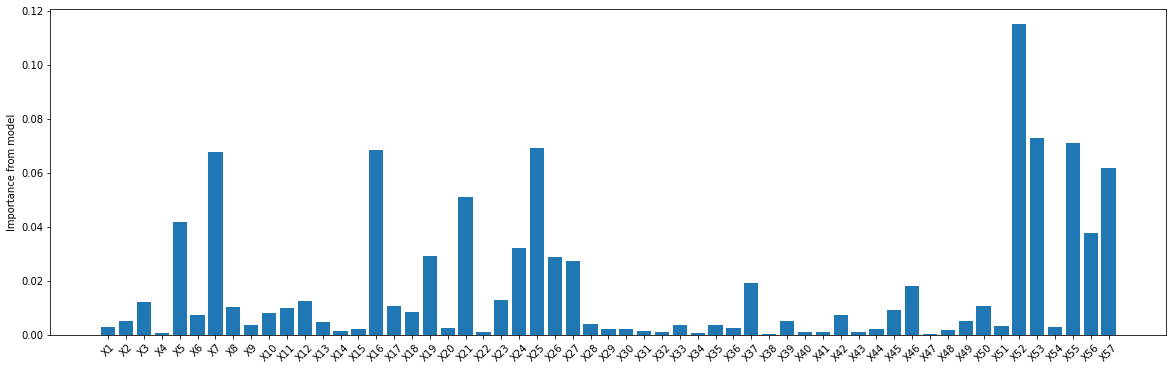

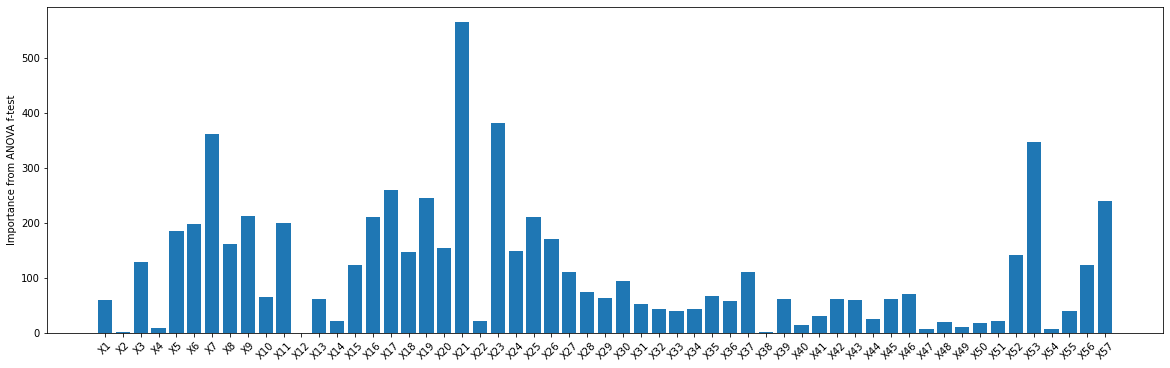

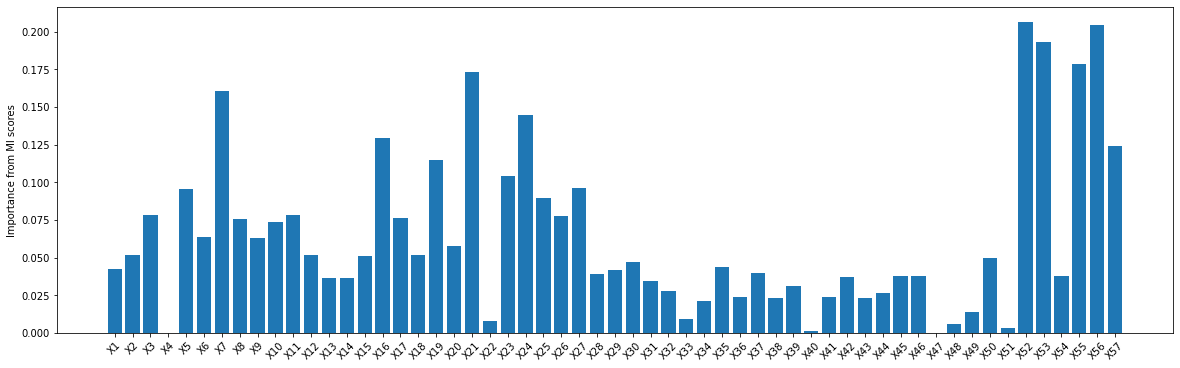

In [30]:
x = np.arange(len(imp_fea.columns))  # the label locations

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(x, imp)
plt.xticks(x, imp_fea.columns, rotation=45)
plt.ylabel('Importance from model')
plt.show()

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(x, fs_anova_scores)
plt.xticks(x, imp_fea.columns, rotation=45)
plt.ylabel('Importance from ANOVA f-test')
plt.show()

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(x, fs_mi_scores)
plt.ylabel('Importance from MI scores')
plt.xticks(x, imp_fea.columns, rotation=45)
plt.show()

# Random Forest Model

### Hyper Parameter tuning

In [31]:
X = data.drop('Y',axis=1)

pipe = Pipeline(( 
                ('pt',   PowerTransformer(standardize=True)),
                ('norm', StandardScaler()),
                ('rfc', RandomForestClassifier(class_weight='balanced_subsample')),
                ))

params = {'rfc__n_estimators': [20,25,30,35,40,45,50,55,60],
             
              'rfc__max_depth': [10,15,20,25,30,35,40,45,50]
             }

gs = GridSearchCV(cv = 5,estimator=pipe,param_grid=params)
gs.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=(('pt', PowerTransformer()),
                                       ('norm', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(class_weight='balanced_subsample')))),
             param_grid={'rfc__max_depth': [25, 30, 35, 40, 45, 50],
                         'rfc__n_estimators': [45, 50, 55, 60]})

In [ ]:
gs_results = pd.DataFrame(gs.cv_results_)
gs_results

In [ ]:
split_result = gs_results[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','mean_test_score']]
split_result

In [34]:
print(gs.best_score_)
print(gs.best_params_)

0.9539641943734015
{'rfc__max_depth': 50, 'rfc__n_estimators': 45}


In [35]:
best_pipe = gs.best_estimator_
best_pipe

Pipeline(steps=[('pt', PowerTransformer()), ('norm', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=50, n_estimators=45))])

# Train Test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
best_pipe.fit(X_train, y_train)
best_pipe.score(X_test, y_test)

0.9680306905370843

In [38]:
y_pred = best_pipe.predict(X_test)

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       498
         1.0       0.94      0.97      0.96       284

    accuracy                           0.97       782
   macro avg       0.96      0.97      0.97       782
weighted avg       0.97      0.97      0.97       782



In [40]:
print(confusion_matrix(y_pred, y_test))

[[481  17]
 [  8 276]]


# Comparison of scores from different models and different stages of datasets

In [ ]:
# Converting arrays to DataFrame
#anova_train_X = pd.DataFrame(X_train_fs_anova, columns=imp_fea.columns)
#anova_test_X = pd.DataFrame(X_test_fs_anova, columns=imp_fea.columns)
#mi_train_X = pd.DataFrame(X_train_fs_mi, columns=imp_fea.columns)
#mi_test_X = pd.DataFrame(X_test_fs_mi, columns=imp_fea.columns)
#anova_train_X

> Values in these X, y Tables from ANOVA and MI are unscaled
* Not needed right now

## Scaling values of X, y values from ANOVA, MI

In [41]:
#scaler = StandardScaler()
#anova_train_X = pd.DataFrame(scaler.fit_transform(anova_train_X))
#anova_train_X.columns = imp_fea.columns
#anova_test_X = pd.DataFrame(scaler.fit_transform(anova_test_X))
#anova_test_X.columns = imp_fea.columns
#mi_train_X = pd.DataFrame(scaler.fit_transform(mi_train_X))
#mi_train_X.columns = imp_fea.columns
#mi_test_X = pd.DataFrame(scaler.fit_transform(mi_test_X))
#mi_test_X.columns = imp_fea.columns

> Here attested column names with Scaled data because it will be needed in selection of Features
* Not needed right now

In [ ]:
data_scaled

In [ ]:
scaled_data = pd.DataFrame(data_scaled)
scaled_data.columns = imp_fea.columns
scaled_data

## Splitting Datasets for Selected Feature model predictions

In [44]:
sel_train_X, sel_test_X, sel_train_y, sel_test_y = train_test_split(scaled_data, y, test_size=0.20)

In [45]:
anova_fs_scores = pd.DataFrame(fs_anova_scores, index=imp_fea.columns, columns=['anova_scores'])
mi_fs_scores = pd.DataFrame(fs_mi_scores, index=imp_fea.columns, columns=['mi_scores'])
mi_fs_scores.T

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
mi_scores,0.042569,0.051719,0.078101,0.0,0.095208,0.063694,0.160766,0.075519,0.063287,0.073544,...,0.006085,0.014095,0.049595,0.002995,0.20624,0.193379,0.037635,0.178366,0.204225,0.124112


> Attested column name here to get the selected columns in return later from get_n_columns function

In [46]:
def get_n_columns(score_table, col,n):
    sel_columns = score_table[col].nlargest(n).index
    return sel_columns

In [47]:
anova_columns = get_n_columns(anova_fs_scores, 'anova_scores', 10)
anova_columns

Index(['X21', 'X23', 'X7', 'X53', 'X17', 'X19', 'X57', 'X9', 'X16', 'X25'], dtype='object')

In [48]:
mi_columns = get_n_columns(mi_fs_scores, 'mi_scores', 10)
mi_columns

Index(['X52', 'X56', 'X53', 'X55', 'X21', 'X7', 'X24', 'X16', 'X57', 'X19'], dtype='object')

In [ ]:
mi_train_X = scaled_data[mi_columns]
mi_train_X

# Random Forest model on unchanged data, features selected from MI and ANOVA methods

In [50]:
unchanged_data.drop('Unnamed: 0', axis=1, inplace=True)

In [51]:
unchanged_data
raw_X, raw_y = create_XY(unchanged_data)

In [52]:
raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(raw_X, raw_y, test_size=0.20)
raw_rfc = RandomForestClassifier(class_weight='balanced_subsample')
raw_rfc.fit(raw_X_train, raw_y_train)
raw_rfc_predictions = raw_rfc.predict(raw_X_test)
raw_acc = accuracy_score(raw_rfc_predictions, raw_y_test)

print("Accuracy Score for Raw Unscaled Data: {:,.04f}".format(raw_acc))
confusion_matrix(raw_rfc_predictions, raw_y_test)

Accuracy Score for Raw Unscaled Data: 0.9552


array([[455,  20],
       [ 15, 292]])

In [53]:
anova_rfc = RandomForestClassifier(class_weight='balanced_subsample')
anova_rfc.fit(sel_train_X[anova_columns], sel_train_y)
anova_rfc_predictions = anova_rfc.predict(sel_test_X[anova_columns])
anova_acc = accuracy_score(anova_rfc_predictions, sel_test_y)

print("Accuracy Score for ANOMA feature selection method: {:,.04f}".format(anova_acc))
confusion_matrix(anova_rfc_predictions, sel_test_y)

Accuracy Score for ANOMA feature selection method: 0.9118


array([[462,  42],
       [ 27, 251]])

In [54]:
#anova_rfc = RandomForestClassifier(class_weight='balanced_subsample')
#anova_rfc.fit(anova_train_X[anova_columns], y_train)
#anova_rfc_predictions = anova_rfc.predict(anova_test_X[anova_columns])
#anova_acc = accuracy_score(anova_rfc_predictions, y_test)

#print("Accuracy Score for ANOMA feature selection method: {:,.04f}".format(anova_acc))
#confusion_matrix(anova_rfc_predictions, y_test)

In [55]:
mi_rfc = RandomForestClassifier(class_weight='balanced_subsample')
mi_rfc.fit(sel_train_X[mi_columns], sel_train_y)
mi_rfc_predictions = mi_rfc.predict(sel_test_X[mi_columns])
mi_acc = accuracy_score(mi_rfc_predictions, sel_test_y)

print("Accuracy Score for MI feature selection method: {:,.04f}".format(mi_acc))
confusion_matrix(mi_rfc_predictions, sel_test_y)

Accuracy Score for MI feature selection method: 0.9297


array([[470,  36],
       [ 19, 257]])

### Inference
* With 10 features both models predicting with accuracy > 91%
* Prediction is heavily dependent on these features

#### Common Columns

In [58]:
print(anova_columns)
print(mi_columns)
common_columns = set(anova_columns).intersection(mi_columns)
common_columns

Index(['X21', 'X23', 'X7', 'X53', 'X17', 'X19', 'X57', 'X9', 'X16', 'X25'], dtype='object')
Index(['X52', 'X56', 'X53', 'X55', 'X21', 'X7', 'X24', 'X16', 'X57', 'X19'], dtype='object')


{'X16', 'X19', 'X21', 'X53', 'X57', 'X7'}

## Accuracy with these 6 common columns

In [57]:
new_rfc = RandomForestClassifier(class_weight='balanced_subsample')
new_rfc.fit(sel_train_X[common_columns], sel_train_y)
new_rfc_predictions = new_rfc.predict(sel_test_X[common_columns])
new_acc = accuracy_score(new_rfc_predictions, sel_test_y)

print("Accuracy Score for ANOMA feature selection method: {:,.04f}".format(new_acc))
confusion_matrix(new_rfc_predictions, sel_test_y)

Accuracy Score for ANOMA feature selection method: 0.8990


array([[456,  46],
       [ 33, 247]])

# Accuracies for different number of Features Selected

### ANOMA F-test

In [59]:
i=5
while(i<=55):
    anova_columns = get_n_columns(anova_fs_scores, 'anova_scores', i)
    anova_rfc = RandomForestClassifier(class_weight='balanced_subsample')
    anova_rfc.fit(sel_train_X[anova_columns], sel_train_y)
    anova_rfc_predictions = anova_rfc.predict(sel_test_X[anova_columns])
    anova_acc = accuracy_score(anova_rfc_predictions, sel_test_y)

    print("Accuracy Score for {} features with ANOMA method: {:,.04f}".format(i, anova_acc))
    i=i+5

Accuracy Score for 5 features with ANOMA method: 0.8632
Accuracy Score for 10 features with ANOMA method: 0.9118
Accuracy Score for 15 features with ANOMA method: 0.9143
Accuracy Score for 20 features with ANOMA method: 0.9297
Accuracy Score for 25 features with ANOMA method: 0.9450
Accuracy Score for 30 features with ANOMA method: 0.9450
Accuracy Score for 35 features with ANOMA method: 0.9450
Accuracy Score for 40 features with ANOMA method: 0.9501
Accuracy Score for 45 features with ANOMA method: 0.9540
Accuracy Score for 50 features with ANOMA method: 0.9450
Accuracy Score for 55 features with ANOMA method: 0.9488


### MI Feature Selection Method

In [60]:
i=5
while(i<56):
    mi_columns = get_n_columns(mi_fs_scores, 'mi_scores', i)
    mi_rfc = RandomForestClassifier(class_weight='balanced_subsample')
    mi_rfc.fit(sel_train_X[mi_columns], sel_train_y)
    mi_rfc_predictions = mi_rfc.predict(sel_test_X[mi_columns])
    mi_acc = accuracy_score(mi_rfc_predictions, sel_test_y)

    print("Accuracy Score with {} features for MI feature selection method: {:,.04f}".format(i,mi_acc))
    i = i+5

Accuracy Score with 5 features for MI feature selection method: 0.8887
Accuracy Score with 10 features for MI feature selection method: 0.9297
Accuracy Score with 15 features for MI feature selection method: 0.9425
Accuracy Score with 20 features for MI feature selection method: 0.9412
Accuracy Score with 25 features for MI feature selection method: 0.9412
Accuracy Score with 30 features for MI feature selection method: 0.9425
Accuracy Score with 35 features for MI feature selection method: 0.9476
Accuracy Score with 40 features for MI feature selection method: 0.9488
Accuracy Score with 45 features for MI feature selection method: 0.9488
Accuracy Score with 50 features for MI feature selection method: 0.9540
Accuracy Score with 55 features for MI feature selection method: 0.9463


### Inference
* With just 10 features out of 57 we can predict with 92% accuracy. Sometime it varies because random seed has not been made constant.
* So we can conclude few features have a lot of impact on the output.

In [61]:
# Accuracy Score with best estimator
top_score = gs.best_score_
gs.best_params_

{'rfc__max_depth': 50, 'rfc__n_estimators': 45}

# Multiple Predictions

## Decision tree classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier(random_state=1 )
dt_cls.fit(X_train, y_train)
dt_cls_predictions = dt_cls.predict(X_test)
dt_cls_acc = accuracy_score(dt_cls_predictions, y_test)

print("Accuracy for Decision Tree Model: {:,.04f}".format(dt_cls_acc))
confusion_matrix(dt_cls_predictions, y_test)

Accuracy for Decision Tree Model: 0.9194


array([[452,  26],
       [ 37, 267]])

### Bagging Classifier

In [65]:
from sklearn.ensemble import BaggingClassifier
bag_cls = BaggingClassifier(random_state=1 )
bag_cls.fit(X_train, y_train)
bag_cls_predictions = bag_cls.predict(X_test)
bag_cls_acc = accuracy_score(bag_cls_predictions, y_test)

print("Accuracy for Bagging Classifier Model: {:,.04f}".format(bag_cls_acc))
confusion_matrix(dt_cls_predictions, y_test)

Accuracy for Bagging Classifier Model: 0.9488


array([[452,  26],
       [ 37, 267]])

# Submission

In [69]:
test_data = pd.read_csv('/content/test_set.csv').drop(['Unnamed: 0'],axis =1)

In [70]:
test_data.isnull().sum().any()

False

In [ ]:
y_test_prediction = best_pipe.predict(test_data)
y_test_prediction

In [ ]:
test_data['prediction'] = y_test_prediction
test_data.head()

In [ ]:
test_prediction = test_data[['prediction']]
test_prediction = test_prediction.astype(int)
test_prediction

In [76]:
# only prediction Column
test_prediction.to_csv('test_prediction_only_y_values.csv')

In [77]:
# Prediction with whole test data set
test_data.to_csv('test_prediction_with_whole_test_dataset.csv')